### PROJECT STUDENT PERFORMANCE - AMELIA EVITA ALAM ####

### 1. Problem Statement (Permasalahan apa yang akan diselesaikan?)

"Memprediksi nilai ujian akhir siswa berdasarkan faktor demografi, kebiasaan belajar, dan dukungan keluarga"

### 2. Data Collection (Pengumpulan Data)

Data diambil dari : https://www.kaggle.com/datasets/devansodariya/student-performance-data/data

In [277]:
# Panggil Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('student_data.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Tools yang kita gunakan :

| No. | Kolom        | Deskripsi                                                                                                      |
| --- | ------------ | -------------------------------------------------------------------------------------------------------------- |
| 1   | `school`     | Jenis sekolah (0 = GP, 1 = MS)                                                                                 |
| 2   | `sex`        | Jenis kelamin siswa (0 = perempuan, 1 = laki-laki)                                                             |
| 3   | `age`        | Usia siswa (dalam tahun)                                                                                       |
| 4   | `address`    | Tipe alamat tempat tinggal (0 = urban, 1 = rural)                                                              |
| 5   | `famsize`    | Ukuran keluarga (0 = besar, 1 = kecil)                                                                         |
| 6   | `Pstatus`    | Status hubungan orang tua (0 = bersama, 1 = terpisah)                                                          |
| 7   | `Medu`       | Pendidikan ibu (0 = tidak diketahui, 1 = rendah, 2 = menengah, 3 = tinggi)                                     |
| 8   | `Fedu`       | Pendidikan ayah (0 = tidak diketahui, 1 = rendah, 2 = menengah, 3 = tinggi)                                    |
| 9   | `Mjob`       | Pekerjaan ibu (1 = kesehatan, 2 = layanan pendidikan, 3 = manajemen, 4 = rumah tangga, 5 = lain)               |
| 10  | `Fjob`       | Pekerjaan ayah (1 = kesehatan, 2 = layanan pendidikan, 3 = manajemen, 4 = rumah tangga, 5 = lain)              |
| 11  | `reason`     | Alasan memilih sekolah ini (0 = alasan keluarga, 1 = alasan sekolah, 2 = alasan teman, 3 = lain)               |
| 12  | `guardian`   | Wali siswa (0 = ibu, 1 = ayah, 2 = lainnya)                                                                    |
| 13  | `traveltime` | Waktu perjalanan ke sekolah (1 = <15 menit, 2 = 15–30 menit, 3 = 30–60 menit, 4 = >60 menit)                   |
| 14  | `studytime`  | Waktu belajar per minggu (1 = <2 jam, 2 = 2–5 jam, 3 = 5–10 jam, 4 = >10 jam)                                  |
| 15  | `failures`   | Jumlah kegagalan sebelumnya (numeric: 0, 1, 2, 3+)                                                             |
| 16  | `schoolsup`  | Dukungan sekolah tambahan (0 = tidak, 1 = ya)                                                                  |
| 17  | `famsup`     | Dukungan keluarga untuk belajar (0 = tidak, 1 = ya)                                                            |
| 18  | `paid`       | Les privat tambahan (0 = tidak, 1 = ya)                                                                        |
| 19  | `activities` | Kegiatan ekstrakurikuler (0 = tidak, 1 = ya)                                                                   |
| 20  | `nursery`    | Pendidikan prasekolah (0 = tidak, 1 = ya)                                                                      |
| 21  | `higher`     | Keinginan untuk melanjutkan pendidikan tinggi (0 = tidak, 1 = ya)                                              |
| 22  | `internet`   | Akses internet di rumah (0 = tidak, 1 = ya)                                                                    |
| 23  | `romantic`   | Status hubungan romantis (0 = tidak, 1 = ya)                                                                   |
| 24  | `famrel`     | Kualitas hubungan keluarga (1 = sangat buruk, 2 = buruk, 3 = rata-rata, 4 = baik, 5 = sangat baik)             |
| 25  | `freetime`   | Waktu luang setelah sekolah (1 = sangat sedikit, 2 = sedikit, 3 = cukup, 4 = banyak, 5 = sangat banyak)        |
| 26  | `goout`      | Frekuensi pergi keluar bersama teman (1 = sangat jarang, 2 = jarang, 3 = cukup, 4 = sering, 5 = sangat sering) |
| 27  | `Dalc`       | Konsumsi alkohol pada hari kerja (1 = sangat rendah, 2 = rendah, 3 = sedang, 4 = tinggi, 5 = sangat tinggi)    |
| 28  | `Walc`       | Konsumsi alkohol pada akhir pekan (1 = sangat rendah, 2 = rendah, 3 = sedang, 4 = tinggi, 5 = sangat tinggi)   |
| 29  | `health`     | Kondisi kesehatan (1 = sangat buruk, 2 = buruk, 3 = rata-rata, 4 = baik, 5 = sangat baik)                      |
| 30  | `absences`   | Jumlah ketidakhadiran (numeric)                                                                                |
| 31  | `G1`         | Nilai pertama (semester pertama)                                                                               |
| 32  | `G2`         | Nilai kedua (semester kedua)                                                                                   |
| 33  | `G3`         | Nilai akhir (target variabel)                                                                                  |


## 3. Exploratory Data Analysis (EDA)
Tujuan : Untuk memahami kondisi data, menemukan masalah atau pola tersembunyi, dan mempersiapkan data agar siap digunakan dala pemodelan Machine Learning atau analisis lebih lanjut.

In [278]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [279]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [280]:
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

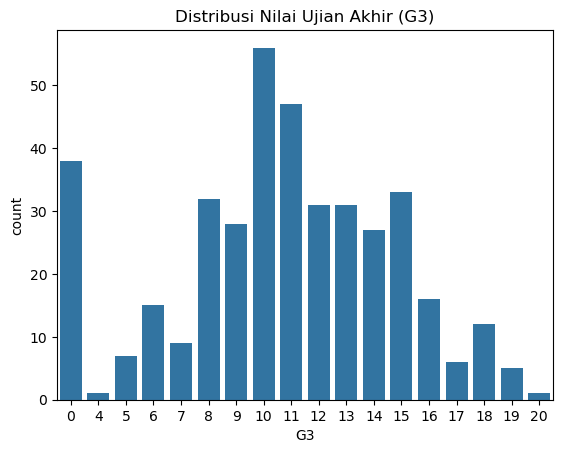

In [281]:
# Distribusi Target
sns.countplot(x='G3', data = df)
plt.title('Distribusi Nilai Ujian Akhir (G3)')
plt.show()

In [282]:
# Melakukan perubahan data pada dataset G3 
df['G3_original'] = df['G3']  #untuk menyimpan nilai asli
df['G3'] = df['G3'].apply(lambda x: 'Lulus' if x >= 10 else 'Tidak Lulus')


=== Demografi ===


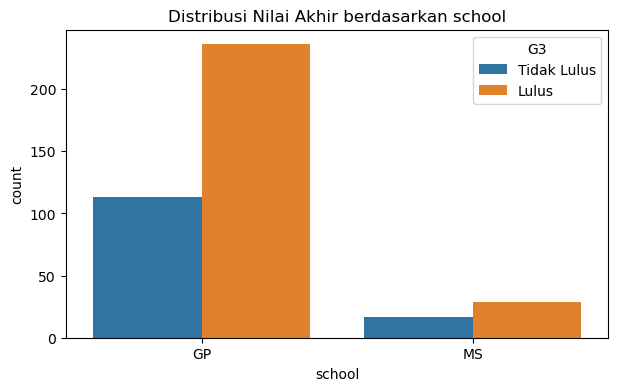

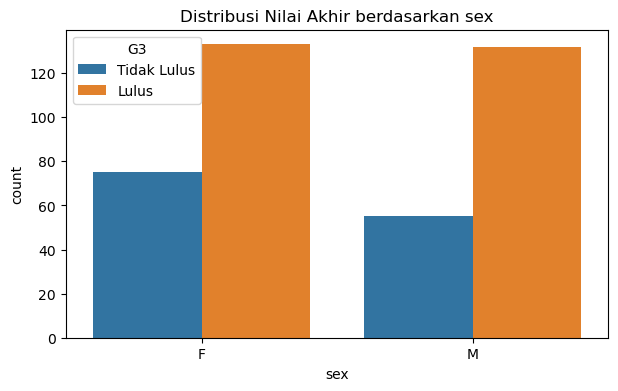

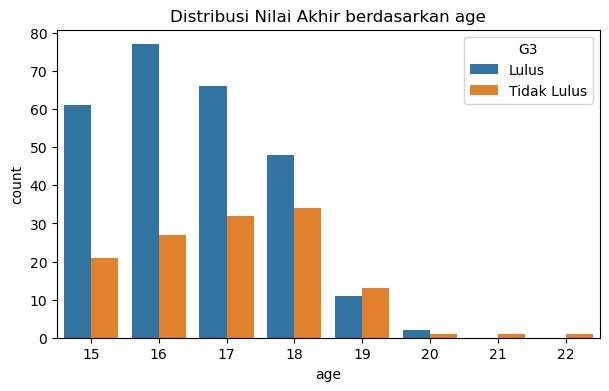

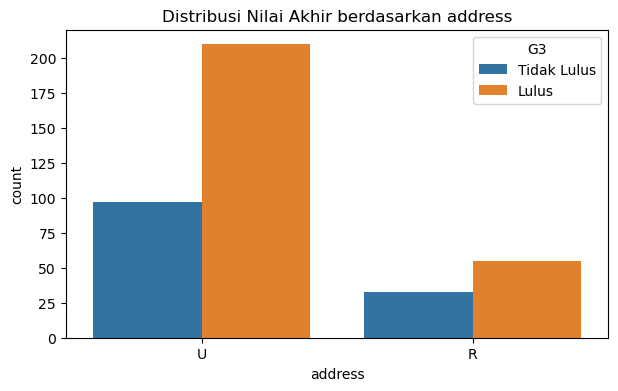

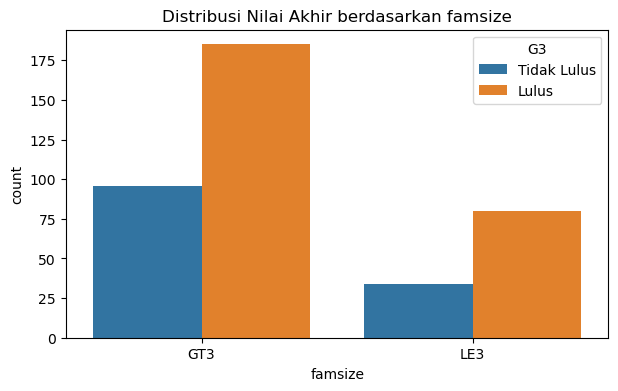

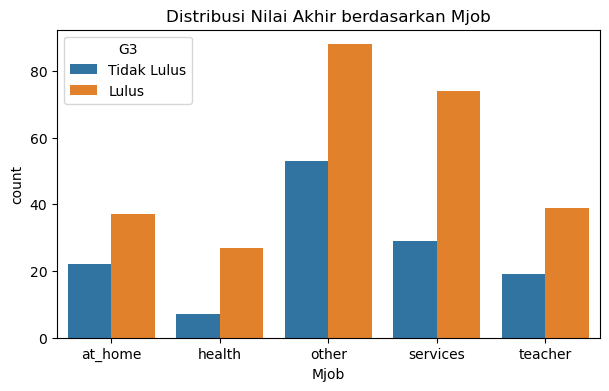

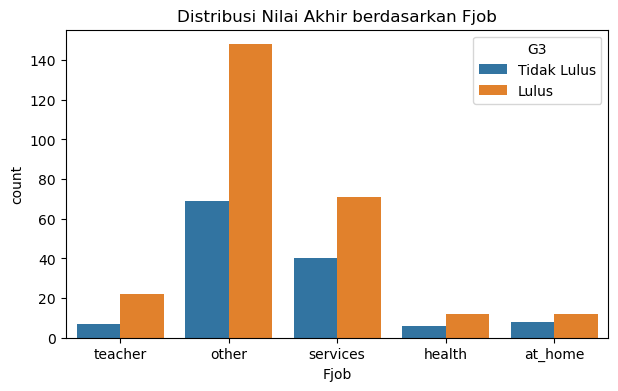

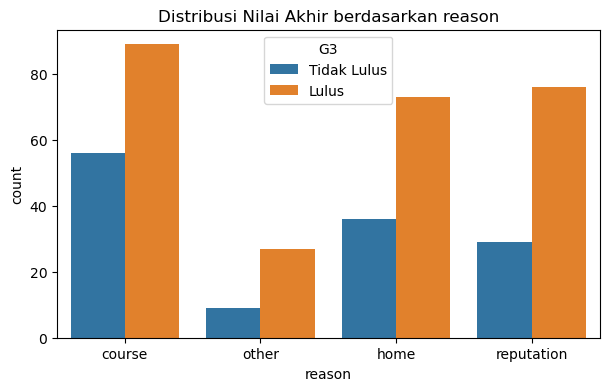

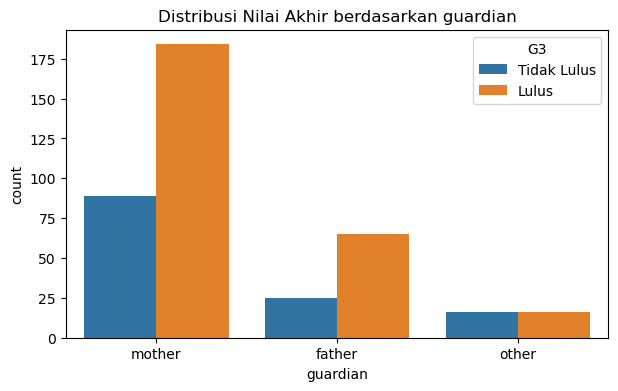


=== Kebiasaan Belajar ===


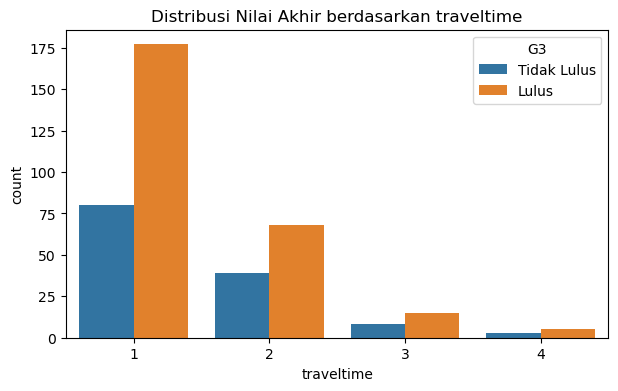

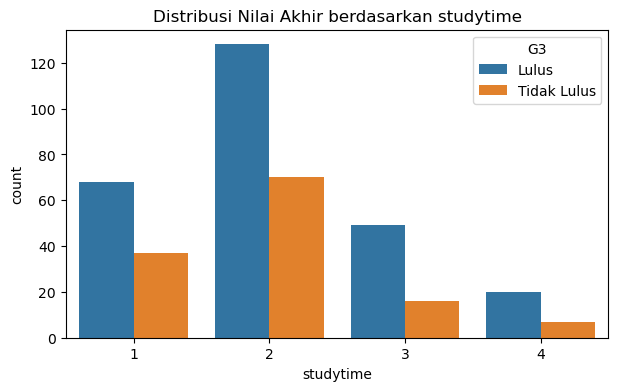

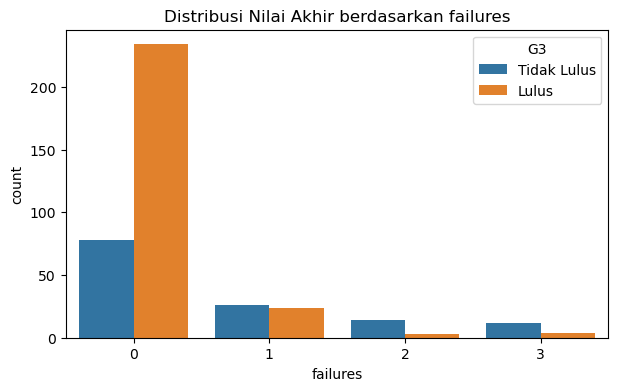

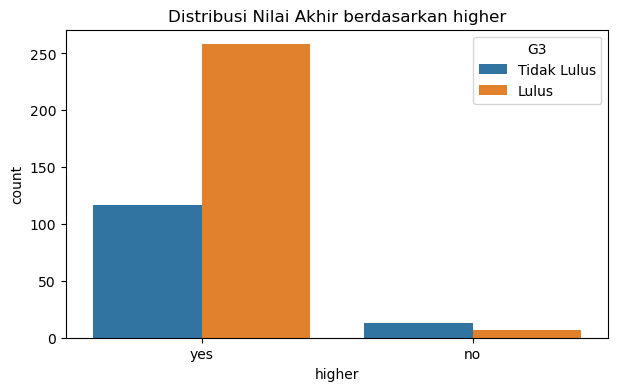

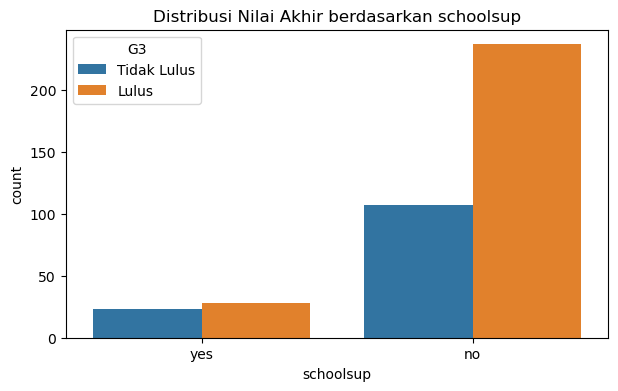

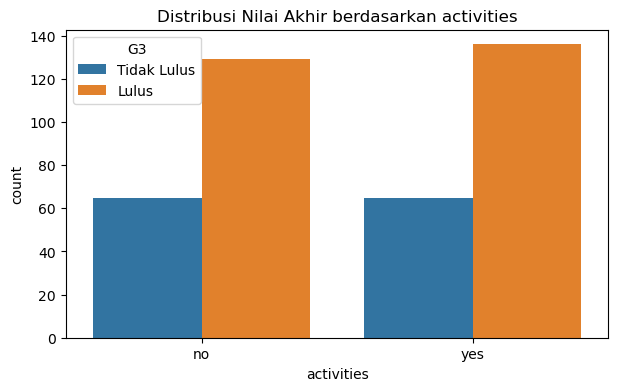

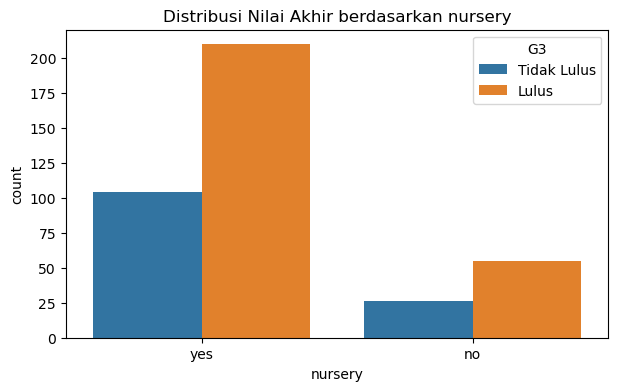

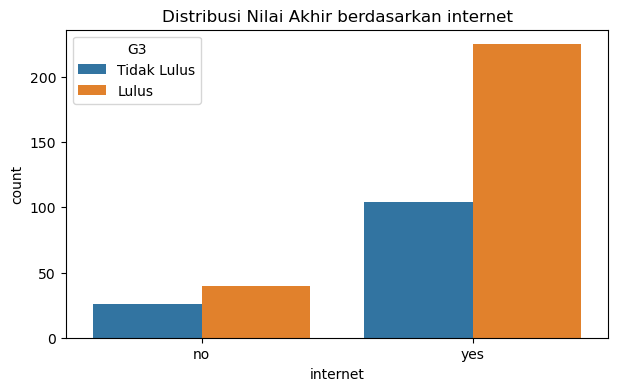

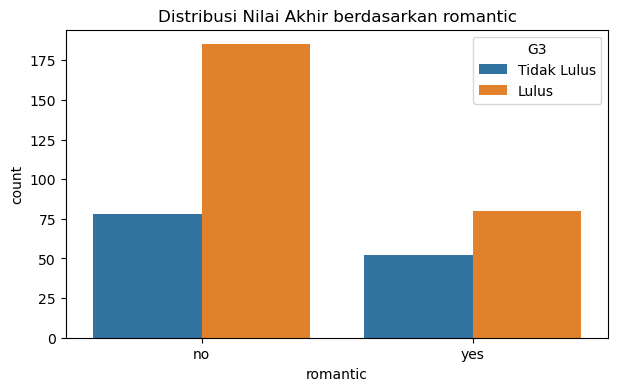

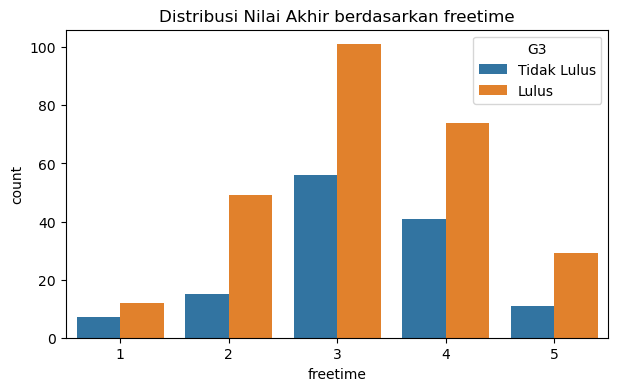

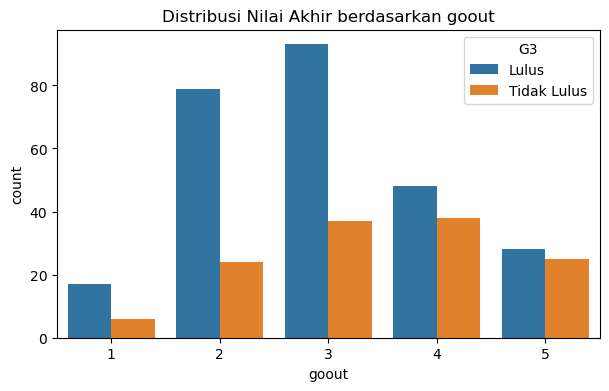

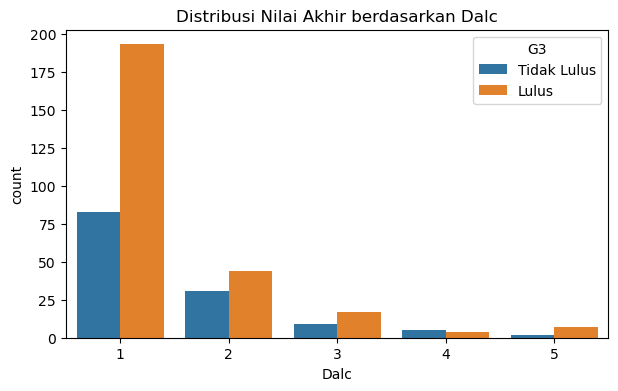

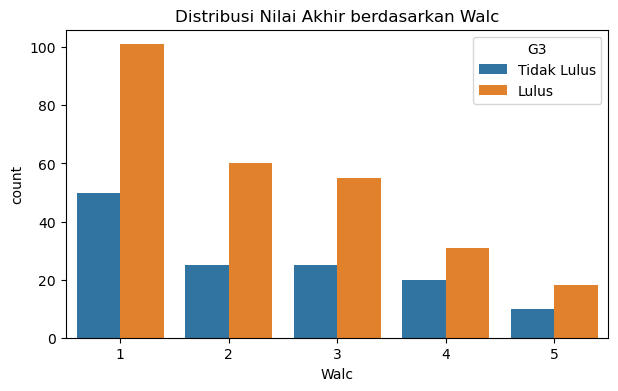

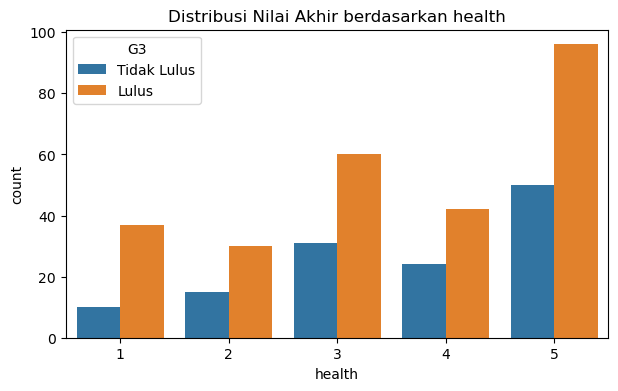

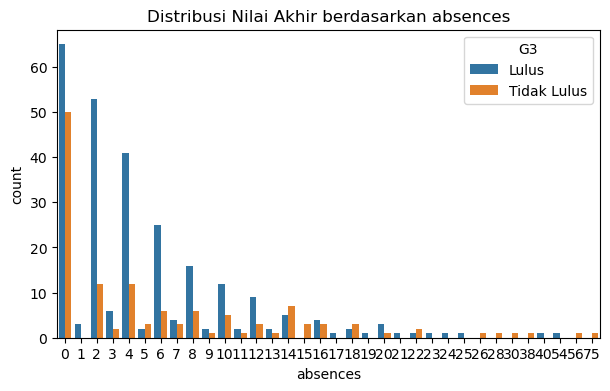


=== Dukungan Keluarga ===


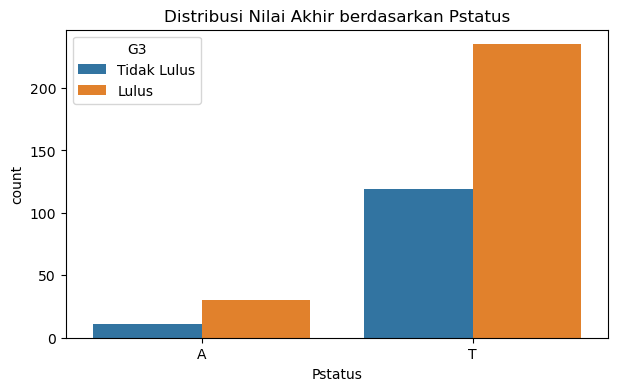

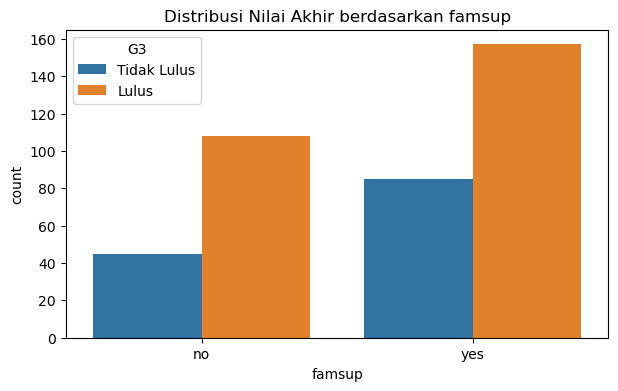

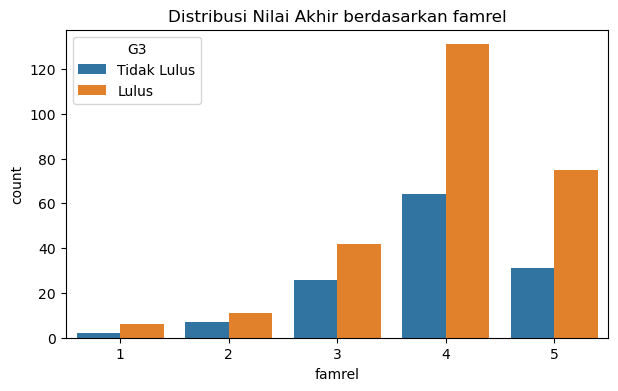

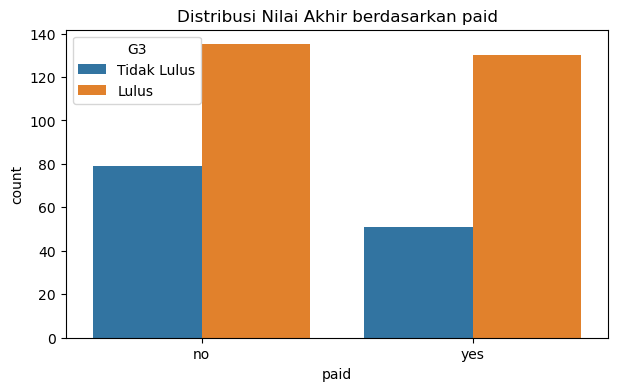

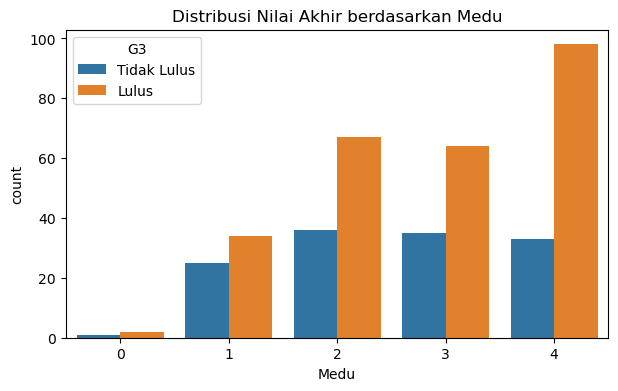

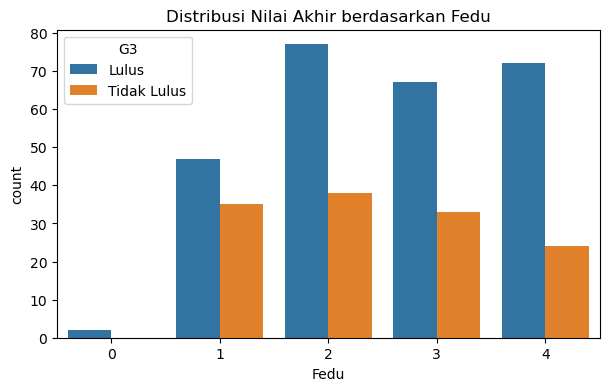

In [285]:
# Daftar kolom kategorikal sesuai tujuan
kategori = {
    "Demografi": ["school","sex", "age", "address","famsize","Mjob", "Fjob", "reason", "guardian" ],
    "Kebiasaan Belajar": ["traveltime","studytime", "failures", "higher", "schoolsup", "activities", "nursery","internet", "romantic","freetime","goout","Dalc", "Walc", "health", "absences"],
    "Dukungan Keluarga": ["Pstatus", "famsup", "famrel", "paid", "Medu", "Fedu"],
}

# Looping otomatis bikin countplot
for group, cols in kategori.items():
    print(f"\n=== {group} ===")
    for col in cols:
        plt.figure(figsize=(7,4))
        sns.countplot(x=col, hue="G3", data=df)
        plt.title(f"Distribusi Nilai Akhir berdasarkan {col}")
        plt.show()

### 4. Data Cleaning

Tujuan : untuk dilakukan pembersihan data supaya dataset siap dipakai untuk dianalisis.

# Yang dilakukan :
1. Mengatasi Missing Value ( Data yang Hilang )
2. Menghapus Duplikasi 
3. Menangani Data Outlier ( Data yang nilainya jauh berbeda dari mayoritas )
4. Standarisasi Format Data (Membuat Data Konsisten )
5. Membuang Noise / Irrelevant Data ( Membersihkan kolom yang tidak reelevan dan membuat dataset lebih fokus )
6. Memastikan Kualitas Data 

In [ ]:
# 4. Tangani Missing Value

# Numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [257]:
# Cek Missing Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Cek Jumlah Duplikat
print("\n=== Jumlah Duplikat ===")
print(df.duplicated().sum())


=== Missing Values ===
school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
G1             0
G2             0
G3             0
G3_original    0
dtype: int64

=== Jumlah Duplikat ===
0


### 5. Feature Engineering

Tujuan : Mengubah, membuat, atau memilih fitur agar data lebih informatif, konsisten, dan siap dipakai oleh model Machine learning, dengan tujuan untuk meningkatkan performa prediksi.


In [263]:
label_cols = ['sex','school','address','famsize', 'Pstatus','schoolsup','famsup',
              'paid','activities','nursery','higher','internet','romantic']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [264]:
onehot_cols = ['Mjob','Fjob','reason','guardian']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)


In [265]:
scaler = StandardScaler()
numerical_cols = ['age','studytime','failures','absences']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### 6. Data Splitting
--> Proses memisahkan dataset menjadi beberapa bagian, biasanya training set dan testing set, sebelum membangun model machine learning.

Tujuan : sangat penting untuk mengukur performa model secara objektif

In [267]:
# Memisahkan fitur dan target
X = df.drop(columns=['G1','G2','G3'])  # semua fitur kecuali nilai
y = df['G3']  # gunakan nilai asli untuk regression

In [268]:
# Spli Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [269]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (316, 40)
X_test shape: (79, 40)
y_train shape: (316,)
y_test shape: (79,)


### 7. Modelling / Machine Learning

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat objek model
model = LinearRegression()


In [274]:
# Melatih model dengan data training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

=== Logistic Regression ===
Accuracy: 1.0
              precision    recall  f1-score   support

       Lulus       1.00      1.00      1.00        52
 Tidak Lulus       1.00      1.00      1.00        27

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

=== Random Forest ===
Accuracy: 1.0
              precision    recall  f1-score   support

       Lulus       1.00      1.00      1.00        52
 Tidak Lulus       1.00      1.00      1.00        27

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

=== KNN ===
Accuracy: 0.9493670886075949
              precision    recall  f1-score   support

       Lulus       0.94      0.98      0.96        52
 Tidak Lulus       0.96      0.89      0.92        27

    accuracy                           0.95        79
   macro 

| Model               | Akurasi |
| ------------------- | ------- |
| Logistic Regression | \~100%   |
| Random Forest       | \~100%   |
| KNN                 | \~94%   |


### 8. Evaluation Model

Menggunakan Model logistic regression sebagai model terbaik lalu membuat confusion matrix untuk melihat performa prediksi lebih detail.



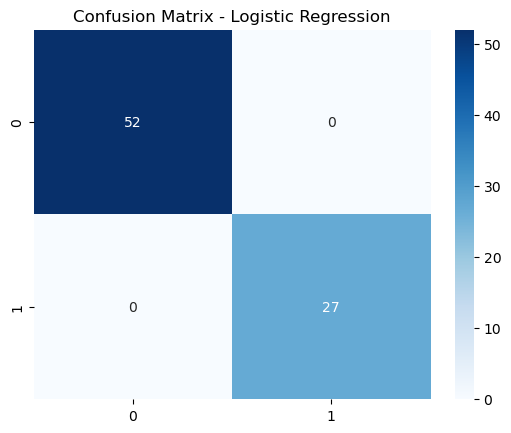

In [275]:
best_model = LogisticRegression(random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

|              | Prediksi 0 | Prediksi 1 |
| ------------ | ---------- | ---------- |
| **Aktual 0** | 52 (TN)    | 0 (FP)    |
| **Aktual 1** | 0 (FN)    | 27 (TP)    |

Penjelasan insight-nya:

1. True Negative (TN) = 52.

2. False Positive (FP) = 0. 

3. False Negative (FN) = 0. 

4. True Positive (TP) = 27. 

#### 9. Hyperparameter Tuning (Machine Learning)
Dilakukan pencarian parameter terbaik untuk Random Forest menggunakan GridSearchCV:

GridSearchCV adalah metode untuk mencari kombinasi parameter terbaik pada model machine learning dengan cara mencoba semua kemungkinan kombinasi (grid search) dan memilih yang menghasilkan performa terbaik berdasarkan evaluasi (cross-validation).


In [276]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # gunakan sesuai solver
    'solver': ['liblinear']    # liblinear mendukung l1 & l2
}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           cv=5,        # cross-validation 5-fold
                           scoring='accuracy')  # metrik evaluasi

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.9936507936507937
